In [36]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import random
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

%matplotlib inline

In [37]:
ProjectData=pd.read_csv('3clean_hotel_data.csv')
ProjectData.head()
#feature1=['hotel','customer_type','meal','reserved_room_type','assigned_room_type','deposit_type','adr','required_car_parking_spaces']
#AssignmentData=ProjectData[feature1] #set a new dataset that only contains the data we want to explore
#AssignmentData.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,2,2,3,0,0,2,0.0,0,0,15
1,1,0,737,2015,5,27,1,0,0,2,...,2,2,4,0,0,2,0.0,0,0,15
2,1,0,7,2015,5,27,1,0,1,1,...,0,2,0,0,0,2,75.0,0,0,46
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,0,2,75.0,0,0,46
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,0,2,98.0,0,1,76


In [38]:
X=ProjectData.drop('is_canceled',axis=1)
y=ProjectData['is_canceled']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y),test_size=0.2,random_state=4)  

D:\InstallationRoom\Python\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


------------------------Decision Tree--------------- ---------------
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     22347
           1       0.85      0.64      0.73     13470

    accuracy                           0.82     35817
   macro avg       0.83      0.79      0.80     35817
weighted avg       0.83      0.82      0.82     35817

------------------------QDA-------------------------------
              precision    recall  f1-score   support

           0       0.96      0.18      0.31     22347
           1       0.42      0.99      0.59     13470

    accuracy                           0.48     35817
   macro avg       0.69      0.58      0.45     35817
weighted avg       0.76      0.48      0.41     35817



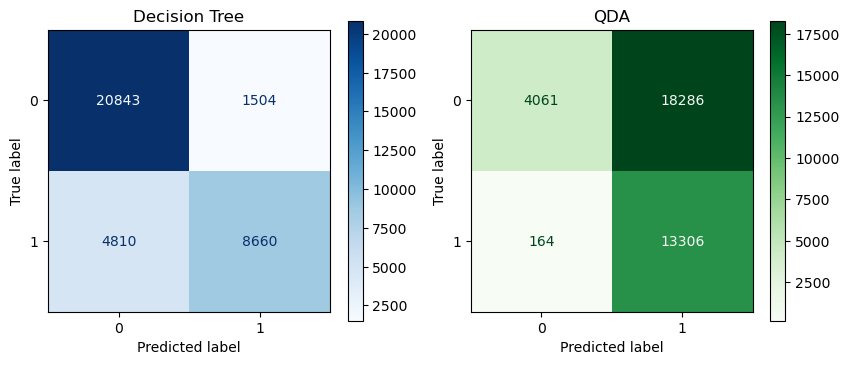

In [25]:
clf = DecisionTreeClassifier(max_depth=10,min_samples_split=2,min_samples_leaf=1)
clf = clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest= clf.predict(X_test)

#because the model has random sampling, a random seed can ensure repeated results.
clf1 = QuadraticDiscriminantAnalysis()
clf1 = clf1.fit(X_train, y_train)
Y_predTrain1 = clf1.predict(X_train)
Y_predTest1 = clf1.predict(X_test)

fig, axs = plt.subplots(ncols=2, figsize=(10, 3.9))

ConfusionMatrixDisplay.from_predictions(y_test, Y_predTest, labels=clf.classes_, cmap= plt.cm.Blues, ax=axs[0])
rfm = ConfusionMatrixDisplay.from_predictions(y_test, Y_predTest1, labels=clf1.classes_, cmap= plt.cm.Greens, ax=axs[1])
axs[0].set_title("Decision Tree")
axs[1].set_title("QDA")

print("------------------------Decision Tree--------------- ---------------")
print(classification_report(y_test, Y_predTest))
print("------------------------QDA-------------------------------")
print(classification_report(y_test, Y_predTest1))

------------------------NB--------------- ---------------
              precision    recall  f1-score   support

           0       0.84      0.40      0.54      7522
           1       0.46      0.88      0.60      4417

    accuracy                           0.57     11939
   macro avg       0.65      0.64      0.57     11939
weighted avg       0.70      0.57      0.56     11939

------------------------NN-------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7522
           1       0.99      0.93      0.96      4417

    accuracy                           0.97     11939
   macro avg       0.98      0.96      0.97     11939
weighted avg       0.97      0.97      0.97     11939



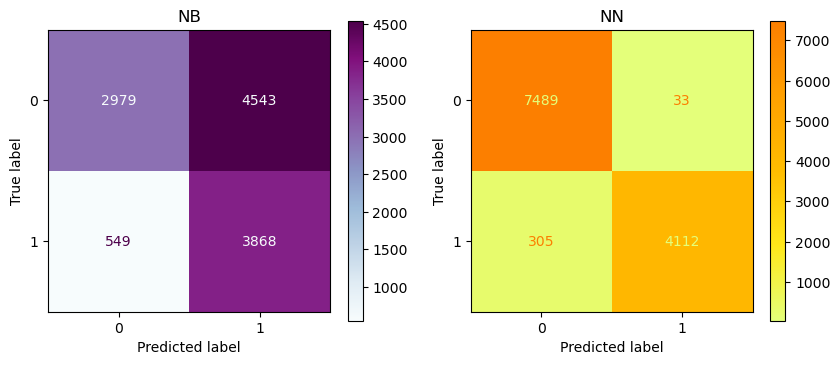

In [41]:
clf2 = GaussianNB()
clf2.fit(X_train, y_train)
Y_predTrain2 = clf2.predict(X_train)
Y_predTest2= clf2.predict(X_test)

clf3 =MLPClassifier(alpha=0.001, max_iter=300,random_state=0)
clf3.fit(X_train, y_train)
Y_predTrain3 = clf3.predict(X_train)
Y_predTest3 = clf3.predict(X_test)

fig, axs = plt.subplots(ncols=2, figsize=(10, 3.9))

ConfusionMatrixDisplay.from_predictions(y_test, Y_predTest2, labels=clf2.classes_, cmap= plt.cm.BuPu, ax=axs[0])
rfm = ConfusionMatrixDisplay.from_predictions(y_test, Y_predTest3, labels=clf3.classes_, cmap= plt.cm.Wistia, ax=axs[1])
axs[0].set_title("NB")
axs[1].set_title("NN")

print("------------------------NB--------------- ---------------")
print(classification_report(y_test, Y_predTest2))
print("------------------------NN-------------------------------")
print(classification_report(y_test, Y_predTest3))

In [32]:
scores = cross_val_score(clf, X, y, cv=5)
print('Decision Tree Model CV Score:', scores)
scores = cross_val_score(clf1, X, y, cv=5)
print('QDA CV Score:', scores)
scores = cross_val_score(clf2, X, y, cv=5)
print('NB CV Score:', scores)
scores = cross_val_score(clf3, X, y, cv=5)
print('NN CV Score:', scores)

Decision Tree Model CV Score: [0.56189798 0.48978139 0.63774185 0.58876743 0.42769192]


D:\InstallationRoom\Python\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\InstallationRoom\Python\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\InstallationRoom\Python\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\InstallationRoom\Python\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\InstallationRoom\Python\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA CV Score: [0.60809113 0.5211073  0.42826032 0.42924153 0.38698329]
NB CV Score: [0.67166429 0.59251194 0.57873356 0.49390627 0.41328475]
NN CV Score: [0.91251361 0.79855934 0.9682553  0.94990996 0.96779327]


In [42]:
scores = cross_val_score(clf3, X, y, cv=5)
print('NN CV Score:', scores)

NN CV Score: [0.91251361 0.79855934 0.9682553  0.94990996 0.96779327]
